In [5]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.ticker import MultipleLocator
import warnings
warnings.filterwarnings('ignore')

### Neutral-Current Analysis

In [3]:
df_list = []
data_NCDIS = uproot.pandas.iterate("EIC_DIS_NC_output-merged.root", "Delphes", ["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.T", "Jet.Mass", "Jet.DeltaEta", "Jet.DeltaPhi", 'Jet.Flavor', 'Jet.FlavorAlgo', 'Jet.FlavorPhys', 'Jet.BTag', 'Jet.BTagAlgo', 'Jet.BTagPhys', 'Jet.TauTag', 'Jet.TauWeight', 'Jet.Charge', 'Jet.EhadOverEem', 'Jet.NCharged', 'Jet.NNeutrals', 'Jet.Beta', 'Jet.BetaStar', 'Jet.MeanSqDeltaR', 'Jet.PTD', 'Jet.SoftDroppedJet', 'Jet.SoftDroppedSubJet1', 'Jet.SoftDroppedSubJet2', 'Jet.NSubJetsTrimmed', 'Jet.NSubJetsPruned', 'Jet.NSubJetsSoftDropped', 'Jet.ExclYmerge23', 'Jet.ExclYmerge34', 'Jet.ExclYmerge45', 'Jet.ExclYmerge56', 'Jet.Constituents', 'Jet.Particles', 'Jet.Area'], flatten=True)
for dataframe in data_NCDIS:
    df_list.append(dataframe)
jet_data_NCDIS = pd.concat(df_list)
jet_data_NCDIS.reset_index(inplace=True, drop=True)
#jet_data_NCDIS.to_csv('jet_data_NCDIS_EIC_LHAPDF6.csv')

In [6]:
#Jet Flavor Cutting

#Charm-Jets
jet_data_charm_NCDIS = jet_data_NCDIS[jet_data_NCDIS['Jet.Flavor'] == 4]
jet_data_charm_NCDIS.reset_index(inplace=True, drop=True)

#Light and Gluon Jets
jet_data_light_NCDIS = jet_data_NCDIS[(jet_data_NCDIS['Jet.Flavor'] < 4) | (jet_data_NCDIS['Jet.Flavor'] == 21)]
jet_data_light_NCDIS.reset_index(inplace=True, drop=True)

#Bottom-Jets
jet_data_bottom_NCDIS = jet_data_NCDIS[jet_data_NCDIS['Jet.Flavor'] == 5]
jet_data_bottom_NCDIS.reset_index(inplace=True, drop=True)

In [26]:
jet_rap_NCDIS = rapidity_calculate(jet_data_NCDIS)
jet_rap_charm_NCDIS = rapidity_calculate(jet_data_charm_NCDIS)
jet_rap_light_NCDIS = rapidity_calculate(jet_data_light_NCDIS)
jet_rap_bottom_NCDIS = rapidity_calculate(jet_data_bottom_NCDIS)

In [27]:
jet_deltaR_NCDIS = np.sqrt(jet_data_NCDIS['Jet.DeltaPhi']**2 + jet_data_NCDIS['Jet.DeltaEta']**2)
jet_deltaR_charm_NCDIS = np.sqrt(jet_data_charm_NCDIS['Jet.DeltaPhi']**2 + jet_data_charm_NCDIS['Jet.DeltaEta']**2)
jet_deltaR_light_NCDIS = np.sqrt(jet_data_light_NCDIS['Jet.DeltaPhi']**2 + jet_data_light_NCDIS['Jet.DeltaEta']**2)
jet_deltaR_bottom_NCDIS = np.sqrt(jet_data_bottom_NCDIS['Jet.DeltaPhi']**2 + jet_data_bottom_NCDIS['Jet.DeltaEta']**2)

jet_R_NCDIS = np.sqrt(jet_data_NCDIS['Jet.Phi']**2 + jet_data_NCDIS['Jet.Eta']**2)
jet_R_charm_NCDIS = np.sqrt(jet_data_charm_NCDIS['Jet.Phi']**2 + jet_data_charm_NCDIS['Jet.Eta']**2)
jet_R_light_NCDIS = np.sqrt(jet_data_light_NCDIS['Jet.Phi']**2 + jet_data_light_NCDIS['Jet.Eta']**2)
jet_R_bottom_NCDIS = np.sqrt(jet_data_bottom_NCDIS['Jet.Phi']**2 + jet_data_bottom_NCDIS['Jet.Eta']**2)

In [12]:
def error_calculate(data_array):
    raw_error = np.sqrt(data_array)
    rel_error = raw_error/data_array
    norm_data_array = data_array/sum(data_array)
    norm_rel_error = rel_error*norm_data_array
    norm_rel_error = np.nan_to_num(norm_rel_error)
    
    return norm_rel_error

def rapidity_calculate(dataframe):
    mass = dataframe['Jet.Mass']
    pT = dataframe['Jet.PT']
    eta = dataframe['Jet.Eta']
    y = np.log((np.sqrt(mass**2+pT**2*np.cosh(eta)**2)+pT*np.sinh(eta))/(np.sqrt(mass**2+pT**2)))
    return y

def error_bar_hist_plotting(data, bin_count, range_min, range_max, xlabel, ylabel, title, color):
    plt.figure(0)
    (counts, bin_values, patches) = plt.hist(data, bins=bin_count, range=(range_min, range_max), histtype='step', color='white');
    counts = np.append(counts, 0)

    plt.figure(1)
    plt.errorbar(bin_values, counts/sum(counts), yerr=error_calculate(counts),ecolor='black',capsize=2,drawstyle='steps-mid',color=color)
    plt.xlim(range_min, range_max)
    plt.ylim(0,max(max(counts/sum(counts))*1.05,plt.gca().get_ylim()[1]))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.minorticks_on()

    return 0

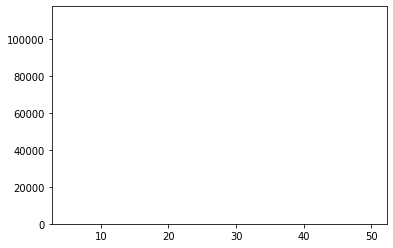

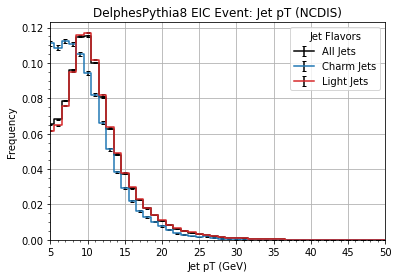

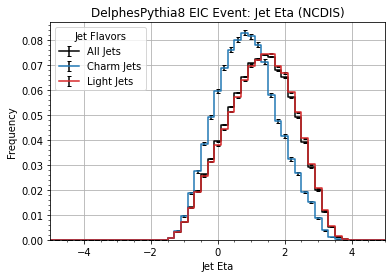

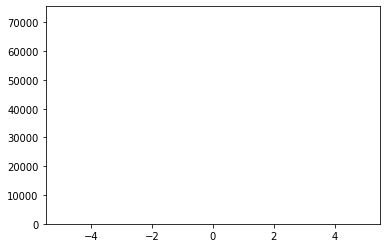

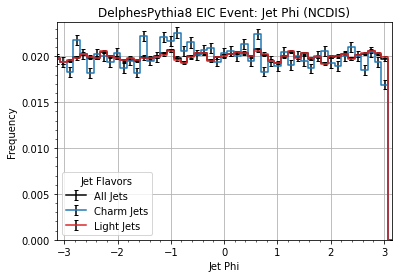

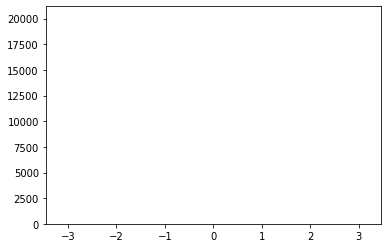

<Figure size 432x288 with 0 Axes>

In [14]:
#Analyzing Jet pT
error_bar_hist_plotting(jet_data_NCDIS['Jet.PT'], 45, 5, 50, 'Jet pT (GeV)', 'Frequency', 'DelphesPythia8 EIC Event: Jet pT (NCDIS)', 'black')
error_bar_hist_plotting(jet_data_charm_NCDIS['Jet.PT'], 45, 5, 50, 'Jet pT (GeV)', 'Frequency', 'DelphesPythia8 EIC Event: Jet pT (NCDIS)', 'tab:blue')
error_bar_hist_plotting(jet_data_light_NCDIS['Jet.PT'], 45, 5, 50, 'Jet pT (GeV)', 'Frequency', 'DelphesPythia8 EIC Event: Jet pT (NCDIS)', 'tab:red')
plt.legend(['All Jets','Charm Jets','Light Jets'],title='Jet Flavors')
#plt.savefig('Graphics/jet_pt_NCDIS.jpg',dpi=300)
plt.show()
plt.clf()

#Analyzing Jet eta
error_bar_hist_plotting(jet_data_NCDIS['Jet.Eta'], 50, -5, 5, 'Jet Eta', 'Frequency', 'DelphesPythia8 EIC Event: Jet Eta (NCDIS)', 'black')
error_bar_hist_plotting(jet_data_charm_NCDIS['Jet.Eta'], 50, -5, 5, 'Jet Eta', 'Frequency', 'DelphesPythia8 EIC Event: Jet Eta (NCDIS)', 'tab:blue')
error_bar_hist_plotting(jet_data_light_NCDIS['Jet.Eta'], 50, -5, 5, 'Jet Eta', 'Frequency', 'DelphesPythia8 EIC Event: Jet Eta (NCDIS)', 'tab:red')
plt.legend(['All Jets','Charm Jets','Light Jets'],title='Jet Flavors')
#plt.savefig('Graphics/jet_eta_NCDIS.jpg',dpi=300)
plt.show()
plt.clf()

#Analyzing Jet phi
error_bar_hist_plotting(jet_data_NCDIS['Jet.Phi'], 50, -math.pi, math.pi, 'Jet Phi', 'Frequency', 'DelphesPythia8 EIC Event: Jet Phi (NCDIS)', 'black')
error_bar_hist_plotting(jet_data_charm_NCDIS['Jet.Phi'], 50, -math.pi, math.pi, 'Jet Phi', 'Frequency', 'DelphesPythia8 EIC Event: Jet Phi (NCDIS)', 'tab:blue')
error_bar_hist_plotting(jet_data_light_NCDIS['Jet.Phi'], 50, -math.pi, math.pi, 'Jet Phi', 'Frequency', 'DelphesPythia8 EIC Event: Jet Phi (NCDIS)', 'tab:red')
plt.legend(['All Jets','Charm Jets','Light Jets'],title='Jet Flavors')
#plt.savefig('Graphics/jet_phi_NCDIS.jpg',dpi=300)
plt.show()
plt.clf()

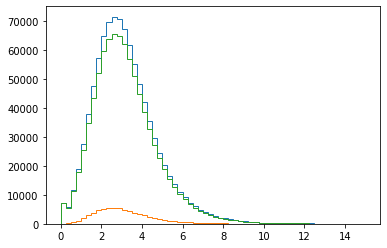

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


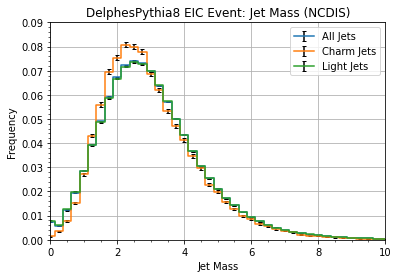

In [33]:
#Analyzing Jet mass

(jet_mass_counts, bins_mass_total, patches_mass_total) = plt.hist(jet_data_NCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step')
(jet_mass_charm_counts, bins_mass_charm, patches_mass_charm) = plt.hist(jet_data_charm_NCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step')
(jet_mass_light_counts, bins_mass_light, patches_mass_light) = plt.hist(jet_data_light_NCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step')
jet_mass_counts = np.append(jet_mass_counts, 0)
jet_mass_charm_counts = np.append(jet_mass_charm_counts, 0)
jet_mass_light_counts = np.append(jet_mass_light_counts, 0)
plt.show()

plt.errorbar(bins_mass_total, jet_mass_counts/sum(jet_mass_counts), yerr=error_calculate(jet_mass_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:blue')
plt.errorbar(bins_mass_charm, jet_mass_charm_counts/sum(jet_mass_charm_counts), yerr=error_calculate(jet_mass_charm_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:orange')
plt.errorbar(bins_mass_light, jet_mass_light_counts/sum(jet_mass_light_counts), yerr=error_calculate(jet_mass_light_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:green')
plt.xlabel('Jet Mass')
plt.ylabel('Frequency')
plt.grid()
plt.minorticks_on()
plt.xlim(0,10)
plt.ylim(0,0.09)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet Mass (NCDIS)')
plt.savefig('Graphics/jet_mass_NCDIS.jpg',dpi=300)
plt.show()

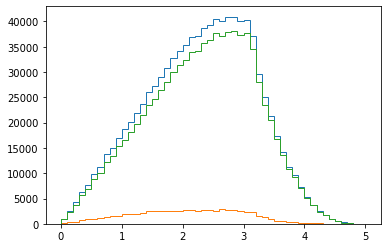

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


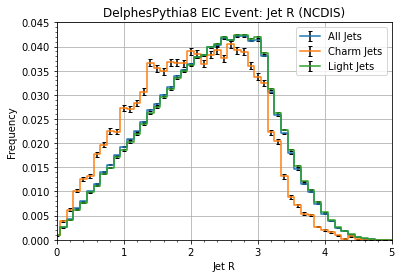

In [34]:
#Analyzing Jet R

(jet_R_counts, bins_R_total, patches_R_total) = plt.hist(jet_R_NCDIS,bins=50,range=(0,5), histtype='step')
(jet_R_charm_counts, bins_R_charm, patches_R_charm) = plt.hist(jet_R_charm_NCDIS,bins=50,range=(0,5), histtype='step')
(jet_R_light_counts, bins_R_light, patches_R_light) = plt.hist(jet_R_light_NCDIS,bins=50,range=(0,5), histtype='step')
jet_R_counts = np.append(jet_R_counts, 0)
jet_R_charm_counts = np.append(jet_R_charm_counts, 0)
jet_R_light_counts = np.append(jet_R_light_counts, 0)
plt.show()

plt.errorbar(bins_R_total, jet_R_counts/sum(jet_R_counts), yerr=error_calculate(jet_R_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:blue')
plt.errorbar(bins_R_charm, jet_R_charm_counts/sum(jet_R_charm_counts), yerr=error_calculate(jet_R_charm_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:orange')
plt.errorbar(bins_R_light, jet_R_light_counts/sum(jet_R_light_counts), yerr=error_calculate(jet_R_light_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:green')
plt.xlabel('Jet R')
plt.ylabel('Frequency')
plt.grid()
plt.minorticks_on()
plt.xlim(0,5)
plt.ylim(0,0.045)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet R (NCDIS)')
plt.savefig('Graphics/jet_R_NCDIS.jpg',dpi=300)
plt.show()

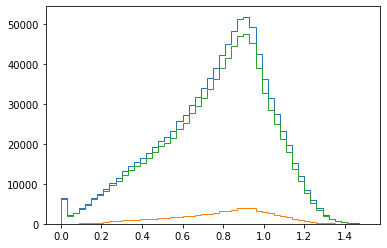

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


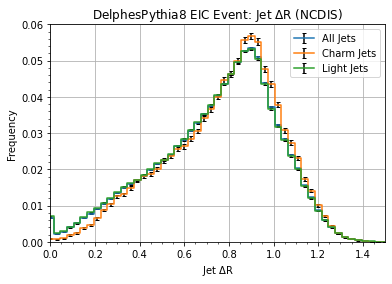

In [35]:
#Analyzing Jet DeltaR

(jet_deltaR_counts, bins_deltaR_total, patches_deltaR_total) = plt.hist(jet_deltaR_NCDIS,bins=50,range=(0,1.5), histtype='step')
(jet_deltaR_charm_counts, bins_deltaR_charm, patches_deltaR_charm) = plt.hist(jet_deltaR_charm_NCDIS,bins=50,range=(0,1.5), histtype='step')
(jet_deltaR_light_counts, bins_deltaR_light, patches_deltaR_light) = plt.hist(jet_deltaR_light_NCDIS,bins=50,range=(0,1.5), histtype='step')
jet_deltaR_counts = np.append(jet_deltaR_counts, 0)
jet_deltaR_charm_counts = np.append(jet_deltaR_charm_counts, 0)
jet_deltaR_light_counts = np.append(jet_deltaR_light_counts, 0)
plt.show()

plt.errorbar(bins_deltaR_total, jet_deltaR_counts/sum(jet_deltaR_counts), yerr=error_calculate(jet_deltaR_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:blue')
plt.errorbar(bins_deltaR_charm, jet_deltaR_charm_counts/sum(jet_deltaR_charm_counts), yerr=error_calculate(jet_deltaR_charm_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:orange')
plt.errorbar(bins_deltaR_light, jet_deltaR_light_counts/sum(jet_deltaR_light_counts), yerr=error_calculate(jet_deltaR_light_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:green')
plt.xlabel('Jet $\Delta$R')
plt.ylabel('Frequency')
plt.grid()
plt.minorticks_on()
plt.xlim(0,1.5)
plt.ylim(0,0.06)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet $\Delta$R (NCDIS)')
plt.savefig('Graphics/jet_deltaR_NCDIS.jpg',dpi=300)
plt.show()

In [1]:
plt.hist2d(jet_data_NCDIS['Jet.Eta'],jet_data_NCDIS['Jet.Phi'],bins=100, range=[[-4,4],[-math.pi,math.pi]])
plt.xlabel('Jet Eta')
plt.ylabel('Jet Phi')
plt.title('Jet Eta v. Phi Distribution (NCDIS)')
plt.savefig('Graphics/jet_eta_phi_NCDIS.jpg',dpi=300)
plt.show()

plt.hist2d(jet_rap_NCDIS, jet_data_NCDIS['Jet.Eta'], bins=100, range=[[-1,4],[-1,4]])
plt.plot([-1,0,1,2,3,4],[-1,0,1,2,3,4],'r--')
plt.xlabel('y')
plt.ylabel('$\eta$')
plt.show()

NameError: name 'plt' is not defined

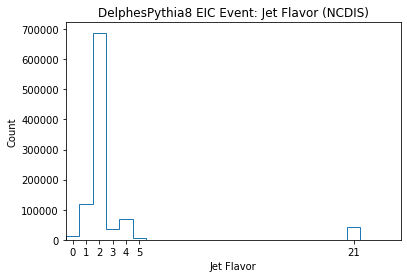

In [37]:
plt.hist(jet_data_NCDIS['Jet.Flavor'], bins=25, range=(0,25), histtype='step')
plt.xlabel('Jet Flavor')
plt.ylabel('Count')
plt.xlim(0,25)
plt.xticks((0.5,1.5,2.5,3.5,4.5,5.5,21.5),['0','1','2','3','4','5','21'])
plt.title('DelphesPythia8 EIC Event: Jet Flavor (NCDIS)')
plt.savefig('Graphics/jet_flavor_NCDIS.jpg',dpi=300)
plt.show()

# plt.hist(jet_data_NCDIS['Jet.NSubJetsTrimmed'],bins=20,range=(0,20), histtype='step',density=True)
# plt.hist(jet_data_charm_NCDIS['Jet.NSubJetsTrimmed'],bins=20,range=(0,20), histtype='step',density=True)
# plt.hist(jet_data_light_NCDIS['Jet.NSubJetsTrimmed'],bins=20,range=(0,20), histtype='step',density=True)
# plt.xticks((0.5,2.5,4.5,6.5,8.5,10.5,12.5,14.5,16.5,18.5,20.5),['0','2','4','6','8','10','12','14','16','18','20'])
# plt.xlabel('Jet.NSubJetsTrimmed')
# plt.legend(['All Jets','Charm Jets','Light Jets'])
# plt.ylabel('Frequency')
# plt.title('DelphesPythia8 EIC Event: Jet NSubJetsTrimmed (NCDIS)')
# plt.savefig('Graphics/jet_nsubjetstrimmed_NCDIS.jpg',dpi=300)
# plt.show()

# plt.hist(jet_data_NCDIS['Jet.Charge'],bins=8,range=(-4,4), histtype='step',density=True)
# plt.hist(jet_data_charm_NCDIS['Jet.Charge'],bins=8,range=(-4,4), histtype='step',density=True)
# plt.hist(jet_data_light_NCDIS['Jet.Charge'],bins=8,range=(-4,4), histtype='step',density=True)
# plt.xlabel('Jet.Charge')
# plt.legend(['All Jets','Charm Jets','Light Jets'])
# plt.ylabel('Frequency')
# plt.title('DelphesPythia8 EIC Event: Jet Charge (NCDIS)')
# plt.savefig('Graphics/jet_charge_NCDIS.jpg',dpi=300)
# plt.show()

# plt.hist(jet_nConstituents,bins=35,range=(0,35), histtype='step',density=True)
# plt.hist(jet_nConstituents_charm,bins=35,range=(0,35), histtype='step',density=True)
# plt.hist(jet_nConstituents_light,bins=35,range=(0,35), histtype='step',density=True)
# plt.xlabel('N_Jet.Constituents')
# plt.legend(['All Jets','Charm Jets','Light Jets'])
# plt.ylabel('Frequency')
# plt.title('DelphesPythia8 EIC Event: Number Jet Constituents (NCDIS)')
# plt.savefig('Graphics/jet_nConstituents_NCDIS.jpg',dpi=300)
# plt.show()

# plt.hist(jet_data_NCDIS['Jet.NCharged'],bins=20,range=(0,20), histtype='step',density=True)
# plt.hist(jet_data_charm_NCDIS['Jet.NCharged'],bins=20,range=(0,20), histtype='step',density=True)
# plt.hist(jet_data_light_NCDIS['Jet.NCharged'],bins=20,range=(0,20), histtype='step',density=True)
# plt.xlabel('Jet.NCharged')
# plt.legend(['All Jets','Charm Jets','Light Jets'])
# plt.ylabel('Frequency')
# plt.title('DelphesPythia8 EIC Event: Number Jet Charged Constituents (NCDIS)')
# plt.savefig('Graphics/jet_nChargedConstituents_NCDIS.jpg',dpi=300)
# plt.show()

# plt.hist(jet_data_NCDIS['Jet.NNeutrals'],bins=20,range=(0,20), histtype='step',density=True)
# plt.hist(jet_data_charm_NCDIS['Jet.NNeutrals'],bins=20,range=(0,20), histtype='step',density=True)
# plt.hist(jet_data_light_NCDIS['Jet.NNeutrals'],bins=20,range=(0,20), histtype='step',density=True)
# plt.xlabel('Jet.NNeutrals')
# plt.legend(['All Jets','Charm Jets','Light Jets'])
# plt.ylabel('Frequency')
# plt.title('DelphesPythia8 EIC Event: Number Jet Neutral Constituents (NCDIS)')
# plt.savefig('Graphics/jet_nNeutralConstituents_NCDIS.jpg',dpi=300)
# plt.show()

In [11]:
#All Jets
jet_nConstituents = np.zeros(len(jet_data_NCDIS['Jet.PT']))

for i in range(0,len(jet_nConstituents)):
    for j in range(0,len(jet_data_NCDIS['Jet.Constituents'][i])):
        jet_nConstituents[i] += len(jet_data_NCDIS['Jet.Constituents'][i][j])

#Light Jets
jet_nConstituents_light = np.zeros(len(jet_data_light_NCDIS['Jet.PT']))

for i in range(0,len(jet_nConstituents_light)):
    for j in range(0,len(jet_data_light_NCDIS['Jet.Constituents'][i])):
        jet_nConstituents_light[i] += len(jet_data_light_NCDIS['Jet.Constituents'][i][j])
        
#Charm Jets
jet_nConstituents_charm = np.zeros(len(jet_data_charm_NCDIS['Jet.PT']))

for i in range(0,len(jet_nConstituents_charm)):
    for j in range(0,len(jet_data_charm_NCDIS['Jet.Constituents'][i])):
        jet_nConstituents_charm[i] += len(jet_data_charm_NCDIS['Jet.Constituents'][i][j])
        
#Bottom Jets
jet_nConstituents_bottom = np.zeros(len(jet_data_bottom_NCDIS['Jet.PT']))

for i in range(0,len(jet_nConstituents_bottom)):
    for j in range(0,len(jet_data_bottom_NCDIS['Jet.Constituents'][i])):
        jet_nConstituents_bottom[i] += len(jet_data_bottom_NCDIS['Jet.Constituents'][i][j])

### Charged Current Analysis

In [5]:
df_list = []
data_CCDIS = uproot.pandas.iterate("EIC_DIS_CC_output-merged.root", "Delphes", ["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.T", "Jet.Mass", "Jet.DeltaEta", "Jet.DeltaPhi", 'Jet.Flavor', 'Jet.FlavorAlgo', 'Jet.FlavorPhys', 'Jet.BTag', 'Jet.BTagAlgo', 'Jet.BTagPhys', 'Jet.TauTag', 'Jet.TauWeight', 'Jet.Charge', 'Jet.EhadOverEem', 'Jet.NCharged', 'Jet.NNeutrals', 'Jet.Beta', 'Jet.BetaStar', 'Jet.MeanSqDeltaR', 'Jet.PTD', 'Jet.SoftDroppedJet', 'Jet.SoftDroppedSubJet1', 'Jet.SoftDroppedSubJet2', 'Jet.NSubJetsTrimmed', 'Jet.NSubJetsPruned', 'Jet.NSubJetsSoftDropped', 'Jet.ExclYmerge23', 'Jet.ExclYmerge34', 'Jet.ExclYmerge45', 'Jet.ExclYmerge56', 'Jet.Constituents', 'Jet.Particles', 'Jet.Area'], flatten=True)
for dataframe in data_CCDIS:
    df_list.append(dataframe)
jet_data_CCDIS = pd.concat(df_list)
jet_data_CCDIS.reset_index(inplace=True, drop=True)
#jet_data_CCDIS.to_csv('jet_data_CCDIS_EIC.csv')

In [6]:
#Jet Flavor Cutting

#Charm-Jets
jet_data_charm_CCDIS = jet_data_CCDIS[jet_data_CCDIS['Jet.Flavor'] == 4]
jet_data_charm_CCDIS.reset_index(inplace=True, drop=True)

#Light and Gluon Jets
jet_data_light_CCDIS = jet_data_CCDIS[(jet_data_CCDIS['Jet.Flavor'] < 4) | (jet_data_CCDIS['Jet.Flavor'] == 21)]
jet_data_light_CCDIS.reset_index(inplace=True, drop=True)

#Bottom-Jets
jet_data_bottom_CCDIS = jet_data_CCDIS[jet_data_CCDIS['Jet.Flavor'] == 5]
jet_data_bottom_CCDIS.reset_index(inplace=True, drop=True)

In [20]:
jet_deltaR_CCDIS = np.sqrt(jet_data_CCDIS['Jet.DeltaPhi']**2 + jet_data_CCDIS['Jet.DeltaEta']**2)
jet_deltaR_charm_CCDIS = np.sqrt(jet_data_charm_CCDIS['Jet.DeltaPhi']**2 + jet_data_charm_CCDIS['Jet.DeltaEta']**2)
jet_deltaR_light_CCDIS = np.sqrt(jet_data_light_CCDIS['Jet.DeltaPhi']**2 + jet_data_light_CCDIS['Jet.DeltaEta']**2)
jet_deltaR_bottom_CCDIS = np.sqrt(jet_data_bottom_CCDIS['Jet.DeltaPhi']**2 + jet_data_bottom_CCDIS['Jet.DeltaEta']**2)

In [7]:
#All Jets
jet_nConstituents = np.zeros(len(jet_data_CCDIS['Jet.PT']))

for i in range(0,len(jet_nConstituents)):
    for j in range(0,len(jet_data_CCDIS['Jet.Constituents'][i])):
        jet_nConstituents[i] += len(jet_data_CCDIS['Jet.Constituents'][i][j])

#Light Jets
jet_nConstituents_light = np.zeros(len(jet_data_light_CCDIS['Jet.PT']))

for i in range(0,len(jet_nConstituents_light)):
    for j in range(0,len(jet_data_light_CCDIS['Jet.Constituents'][i])):
        jet_nConstituents_light[i] += len(jet_data_light_CCDIS['Jet.Constituents'][i][j])
        
#Charm Jets
jet_nConstituents_charm = np.zeros(len(jet_data_charm_CCDIS['Jet.PT']))

for i in range(0,len(jet_nConstituents_charm)):
    for j in range(0,len(jet_data_charm_CCDIS['Jet.Constituents'][i])):
        jet_nConstituents_charm[i] += len(jet_data_charm_CCDIS['Jet.Constituents'][i][j])
        
#Bottom Jets
jet_nConstituents_bottom = np.zeros(len(jet_data_bottom_CCDIS['Jet.PT']))

for i in range(0,len(jet_nConstituents_bottom)):
    for j in range(0,len(jet_data_bottom_CCDIS['Jet.Constituents'][i])):
        jet_nConstituents_bottom[i] += len(jet_data_bottom_CCDIS['Jet.Constituents'][i][j])

KeyboardInterrupt: 

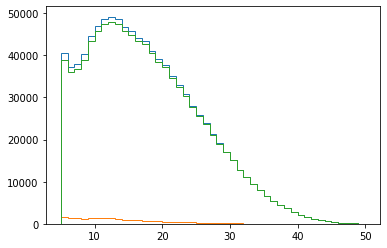

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


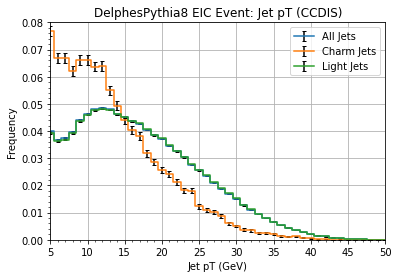

In [11]:
#Analyzing Jet pT

(jet_pt_counts, bins_pt_total, patches_pt_total) = plt.hist(jet_data_CCDIS['Jet.PT'], bins=45, range=(5,50), histtype='step')
(jet_pt_charm_counts, bins_pt_charm, patches_pt_charm) = plt.hist(jet_data_charm_CCDIS['Jet.PT'], bins=45, range=(5,50), histtype='step')
(jet_pt_light_counts, bins_pt_light, patches_pt_light) = plt.hist(jet_data_light_CCDIS['Jet.PT'], bins=45, range=(5,50), histtype='step')
jet_pt_counts = np.append(jet_pt_counts, 0)
jet_pt_charm_counts = np.append(jet_pt_charm_counts, 0)
jet_pt_light_counts = np.append(jet_pt_light_counts, 0)
plt.show()

plt.errorbar(bins_pt_total, jet_pt_counts/sum(jet_pt_counts), yerr=error_calculate(jet_pt_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:blue')
plt.errorbar(bins_pt_charm, jet_pt_charm_counts/sum(jet_pt_charm_counts), yerr=error_calculate(jet_pt_charm_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:orange')
plt.errorbar(bins_pt_light, jet_pt_light_counts/sum(jet_pt_light_counts), yerr=error_calculate(jet_pt_light_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:green')
plt.grid()
plt.minorticks_on()
plt.xlabel('Jet pT (GeV)')
plt.ylabel('Frequency')
plt.xlim(5,50)
plt.ylim(0,0.08)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet pT (CCDIS)')
plt.savefig('Graphics/jet_pt_CCDIS.jpg',dpi=300)
plt.show()

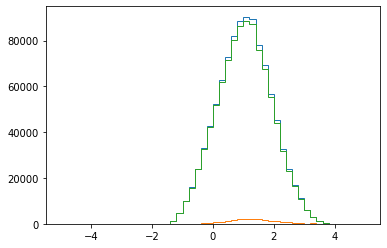

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


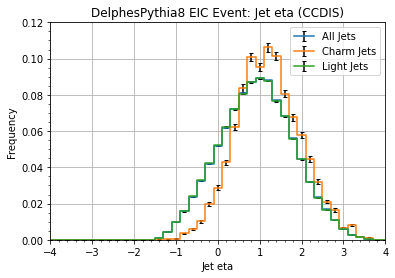

In [13]:
#Analyzing Jet eta

(jet_eta_counts, bins_eta_total, patches_eta_total) = plt.hist(jet_data_CCDIS['Jet.Eta'], bins=50, range=(-5,5), histtype='step')
(jet_eta_charm_counts, bins_eta_charm, patches_eta_charm) = plt.hist(jet_data_charm_CCDIS['Jet.Eta'], bins=50, range=(-5,5), histtype='step')
(jet_eta_light_counts, bins_eta_light, patches_eta_light) = plt.hist(jet_data_light_CCDIS['Jet.Eta'], bins=50, range=(-5,5), histtype='step')
jet_eta_counts = np.append(jet_eta_counts, 0)
jet_eta_charm_counts = np.append(jet_eta_charm_counts, 0)
jet_eta_light_counts = np.append(jet_eta_light_counts, 0)
plt.show()

plt.errorbar(bins_eta_total, jet_eta_counts/sum(jet_eta_counts), yerr=error_calculate(jet_eta_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:blue')
plt.errorbar(bins_eta_charm, jet_eta_charm_counts/sum(jet_eta_charm_counts), yerr=error_calculate(jet_eta_charm_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:orange')
plt.errorbar(bins_eta_light, jet_eta_light_counts/sum(jet_eta_light_counts), yerr=error_calculate(jet_eta_light_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:green')
plt.grid()
plt.minorticks_on()
plt.xlabel('Jet eta')
plt.ylabel('Frequency')
plt.xlim(-4,4)
plt.ylim(0,0.12)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet eta (CCDIS)')
plt.savefig('Graphics/jet_eta_CCDIS.jpg',dpi=300)
plt.show()

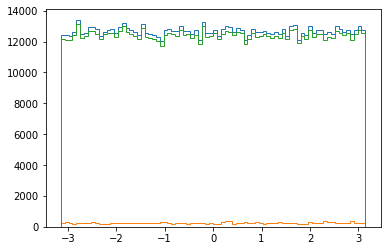

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


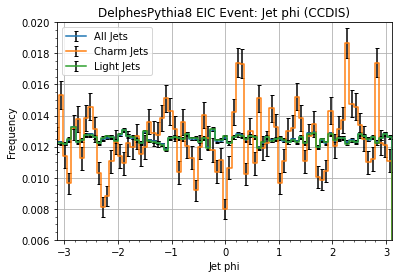

In [16]:
#Analyzing Jet phi

(jet_phi_counts, bins_phi_total, patches_phi_total) = plt.hist(jet_data_CCDIS['Jet.Phi'], bins=80, range=(-math.pi,math.pi), histtype='step')
(jet_phi_charm_counts, bins_phi_charm, patches_phi_charm) = plt.hist(jet_data_charm_CCDIS['Jet.Phi'], bins=80, range=(-math.pi,math.pi), histtype='step')
(jet_phi_light_counts, bins_phi_light, patches_phi_light) = plt.hist(jet_data_light_CCDIS['Jet.Phi'], bins=80, range=(-math.pi,math.pi), histtype='step')
jet_phi_counts = np.append(jet_phi_counts, 0)
jet_phi_charm_counts = np.append(jet_phi_charm_counts, 0)
jet_phi_light_counts = np.append(jet_phi_light_counts, 0)
plt.show()

plt.errorbar(bins_phi_total, jet_phi_counts/sum(jet_phi_counts), yerr=error_calculate(jet_phi_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:blue')
plt.errorbar(bins_phi_charm, jet_phi_charm_counts/sum(jet_phi_charm_counts), yerr=error_calculate(jet_phi_charm_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:orange')
plt.errorbar(bins_phi_light, jet_phi_light_counts/sum(jet_phi_light_counts), yerr=error_calculate(jet_phi_light_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:green')
plt.grid()
plt.minorticks_on()
plt.xlabel('Jet phi')
plt.ylabel('Frequency')
plt.xlim(-math.pi,3.10)
plt.ylim(0.006,0.02)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet phi (CCDIS)')
plt.savefig('Graphics/jet_phi_CCDIS.jpg',dpi=300)
plt.show()

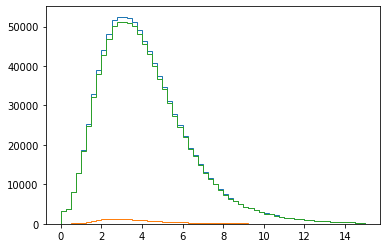

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


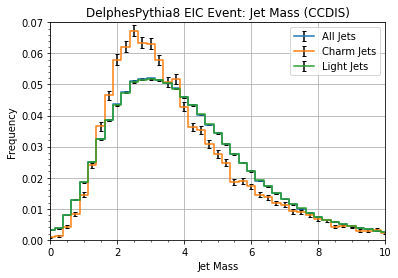

In [18]:
#Analyzing Jet mass

(jet_mass_counts, bins_mass_total, patches_mass_total) = plt.hist(jet_data_CCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step')
(jet_mass_charm_counts, bins_mass_charm, patches_mass_charm) = plt.hist(jet_data_charm_CCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step')
(jet_mass_light_counts, bins_mass_light, patches_mass_light) = plt.hist(jet_data_light_CCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step')
jet_mass_counts = np.append(jet_mass_counts, 0)
jet_mass_charm_counts = np.append(jet_mass_charm_counts, 0)
jet_mass_light_counts = np.append(jet_mass_light_counts, 0)
plt.show()

plt.errorbar(bins_mass_total, jet_mass_counts/sum(jet_mass_counts), yerr=error_calculate(jet_mass_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:blue')
plt.errorbar(bins_mass_charm, jet_mass_charm_counts/sum(jet_mass_charm_counts), yerr=error_calculate(jet_mass_charm_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:orange')
plt.errorbar(bins_mass_light, jet_mass_light_counts/sum(jet_mass_light_counts), yerr=error_calculate(jet_mass_light_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:green')
plt.xlabel('Jet Mass')
plt.ylabel('Frequency')
plt.grid()
plt.minorticks_on()
plt.xlim(0,10)
plt.ylim(0,0.07)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet Mass (CCDIS)')
plt.savefig('Graphics/jet_mass_CCDIS.jpg',dpi=300)
plt.show()

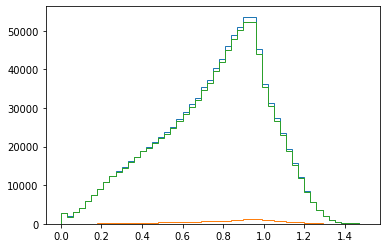

C:\Users\jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


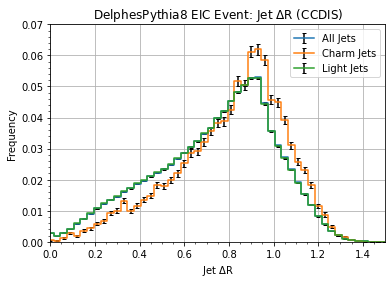

In [22]:
#Analyzing Jet DeltaR

(jet_deltaR_counts, bins_deltaR_total, patches_deltaR_total) = plt.hist(jet_deltaR_CCDIS,bins=50,range=(0,1.5), histtype='step')
(jet_deltaR_charm_counts, bins_deltaR_charm, patches_deltaR_charm) = plt.hist(jet_deltaR_charm_CCDIS,bins=50,range=(0,1.5), histtype='step')
(jet_deltaR_light_counts, bins_deltaR_light, patches_deltaR_light) = plt.hist(jet_deltaR_light_CCDIS,bins=50,range=(0,1.5), histtype='step')
jet_deltaR_counts = np.append(jet_deltaR_counts, 0)
jet_deltaR_charm_counts = np.append(jet_deltaR_charm_counts, 0)
jet_deltaR_light_counts = np.append(jet_deltaR_light_counts, 0)
plt.show()

plt.errorbar(bins_deltaR_total, jet_deltaR_counts/sum(jet_deltaR_counts), yerr=error_calculate(jet_deltaR_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:blue')
plt.errorbar(bins_deltaR_charm, jet_deltaR_charm_counts/sum(jet_deltaR_charm_counts), yerr=error_calculate(jet_deltaR_charm_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:orange')
plt.errorbar(bins_deltaR_light, jet_deltaR_light_counts/sum(jet_deltaR_light_counts), yerr=error_calculate(jet_deltaR_light_counts),ecolor='black',capsize=2,drawstyle='steps-mid',color='tab:green')
plt.xlabel('Jet $\Delta$R')
plt.ylabel('Frequency')
plt.grid()
plt.minorticks_on()
plt.xlim(0,1.5)
plt.ylim(0,0.07)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet $\Delta$R (CCDIS)')
plt.savefig('Graphics/jet_deltaR_CCDIS.jpg',dpi=300)
plt.show()

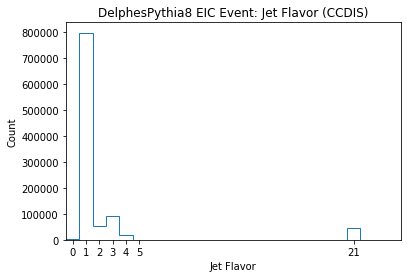

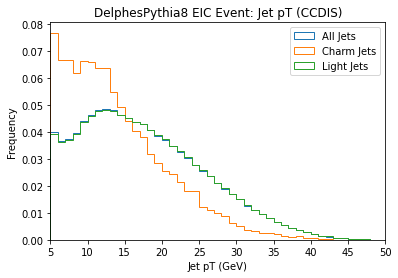

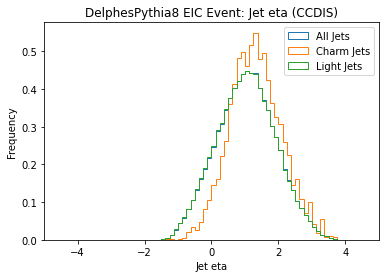

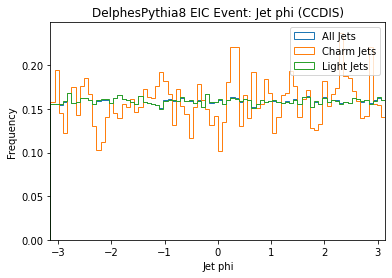

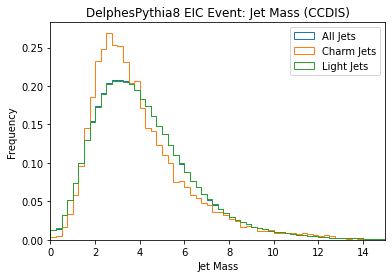

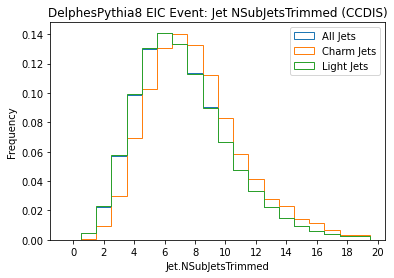

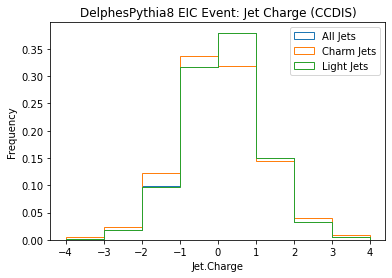

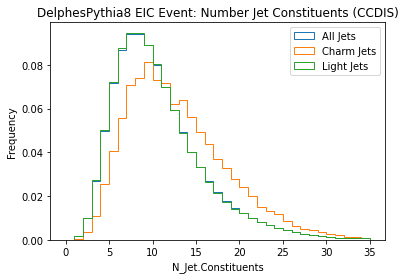

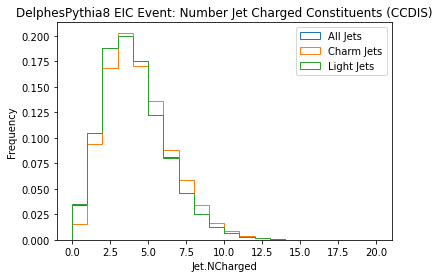

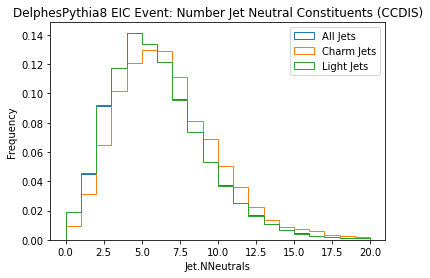

In [203]:
plt.hist(jet_data_CCDIS['Jet.Flavor'], bins=25, range=(0,25), histtype='step')
plt.xlabel('Jet Flavor')
plt.ylabel('Count')
plt.xlim(0,25)
plt.xticks((0.5,1.5,2.5,3.5,4.5,5.5,21.5),['0','1','2','3','4','5','21'])
plt.title('DelphesPythia8 EIC Event: Jet Flavor (CCDIS)')
plt.savefig('Graphics/jet_flavor_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_data_CCDIS['Jet.PT'], bins=50, range=(0,50), histtype='step',density=True)
plt.hist(jet_data_charm_CCDIS['Jet.PT'], bins=50, range=(0,50), histtype='step',density=True)
plt.hist(jet_data_light_CCDIS['Jet.PT'], bins=50, range=(0,50), histtype='step',density=True)
plt.xlabel('Jet pT (GeV)')
plt.ylabel('Frequency')
plt.xlim(5,50)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet pT (CCDIS)')
plt.savefig('Graphics/jet_pt_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_data_CCDIS['Jet.Eta'], bins=80, range=(-5,5), histtype='step',density=True)
plt.hist(jet_data_charm_CCDIS['Jet.Eta'], bins=80, range=(-5,5), histtype='step',density=True)
plt.hist(jet_data_light_CCDIS['Jet.Eta'], bins=80, range=(-5,5), histtype='step',density=True)
plt.xlabel('Jet eta')
plt.ylabel('Frequency')
plt.xlim(-5,5)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet eta (CCDIS)')
plt.savefig('Graphics/jet_eta_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_data_CCDIS['Jet.Phi'], bins=80, range=(-math.pi,math.pi), histtype='step',density=True)
plt.hist(jet_data_charm_CCDIS['Jet.Phi'], bins=80, range=(-math.pi,math.pi), histtype='step',density=True)
plt.hist(jet_data_light_CCDIS['Jet.Phi'], bins=80, range=(-math.pi,math.pi), histtype='step',density=True)
plt.xlabel('Jet phi')
plt.ylabel('Frequency')
plt.xlim(-math.pi,math.pi)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet phi (CCDIS)')
plt.savefig('Graphics/jet_phi_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_data_CCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step',density=True)
plt.hist(jet_data_charm_CCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step',density=True)
plt.hist(jet_data_light_CCDIS['Jet.Mass'], bins=60, range=(0,15), histtype='step',density=True)
plt.xlabel('Jet Mass')
plt.ylabel('Frequency')
plt.xlim(0,15)
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.title('DelphesPythia8 EIC Event: Jet Mass (CCDIS)')
plt.savefig('Graphics/jet_mass_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_data_CCDIS['Jet.NSubJetsTrimmed'],bins=20,range=(0,20), histtype='step',density=True)
plt.hist(jet_data_charm_CCDIS['Jet.NSubJetsTrimmed'],bins=20,range=(0,20), histtype='step',density=True)
plt.hist(jet_data_light_CCDIS['Jet.NSubJetsTrimmed'],bins=20,range=(0,20), histtype='step',density=True)
plt.xticks((0.5,2.5,4.5,6.5,8.5,10.5,12.5,14.5,16.5,18.5,20.5),['0','2','4','6','8','10','12','14','16','18','20'])
plt.xlabel('Jet.NSubJetsTrimmed')
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.ylabel('Frequency')
plt.title('DelphesPythia8 EIC Event: Jet NSubJetsTrimmed (CCDIS)')
plt.savefig('Graphics/jet_nsubjetstrimmed_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_data_CCDIS['Jet.Charge'],bins=8,range=(-4,4), histtype='step',density=True)
plt.hist(jet_data_charm_CCDIS['Jet.Charge'],bins=8,range=(-4,4), histtype='step',density=True)
plt.hist(jet_data_light_CCDIS['Jet.Charge'],bins=8,range=(-4,4), histtype='step',density=True)
plt.xlabel('Jet.Charge')
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.ylabel('Frequency')
plt.title('DelphesPythia8 EIC Event: Jet Charge (CCDIS)')
plt.savefig('Graphics/jet_charge_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_nConstituents,bins=35,range=(0,35), histtype='step',density=True)
plt.hist(jet_nConstituents_charm,bins=35,range=(0,35), histtype='step',density=True)
plt.hist(jet_nConstituents_light,bins=35,range=(0,35), histtype='step',density=True)
plt.xlabel('N_Jet.Constituents')
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.ylabel('Frequency')
plt.title('DelphesPythia8 EIC Event: Number Jet Constituents (CCDIS)')
plt.savefig('Graphics/jet_nConstituents_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_data_CCDIS['Jet.NCharged'],bins=20,range=(0,20), histtype='step',density=True)
plt.hist(jet_data_charm_CCDIS['Jet.NCharged'],bins=20,range=(0,20), histtype='step',density=True)
plt.hist(jet_data_light_CCDIS['Jet.NCharged'],bins=20,range=(0,20), histtype='step',density=True)
plt.xlabel('Jet.NCharged')
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.ylabel('Frequency')
plt.title('DelphesPythia8 EIC Event: Number Jet Charged Constituents (CCDIS)')
plt.savefig('Graphics/jet_nChargedConstituents_CCDIS.jpg',dpi=300)
plt.show()

plt.hist(jet_data_CCDIS['Jet.NNeutrals'],bins=20,range=(0,20), histtype='step',density=True)
plt.hist(jet_data_charm_CCDIS['Jet.NNeutrals'],bins=20,range=(0,20), histtype='step',density=True)
plt.hist(jet_data_light_CCDIS['Jet.NNeutrals'],bins=20,range=(0,20), histtype='step',density=True)
plt.xlabel('Jet.NNeutrals')
plt.legend(['All Jets','Charm Jets','Light Jets'])
plt.ylabel('Frequency')
plt.title('DelphesPythia8 EIC Event: Number Jet Neutral Constituents (CCDIS)')
plt.savefig('Graphics/jet_nNeutralConstituents_CCDIS.jpg',dpi=300)
plt.show()

In [146]:
#["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.T", "Jet.Mass", "Jet.DeltaEta", "Jet.DeltaPhi", 'Jet.Flavor', 'Jet.FlavorAlgo', 'Jet.FlavorPhys', 'Jet.BTag', 'Jet.BTagAlgo', 'Jet.BTagPhys', 'Jet.TauTag', 'Jet.TauWeight', 'Jet.Charge', 'Jet.EhadOverEem', 'Jet.NCharged', 'Jet.NNeutrals', 'Jet.Beta', 'Jet.BetaStar', 'Jet.MeanSqDeltaR', 'Jet.PTD', 'Jet.SoftDroppedJet', 'Jet.SoftDroppedSubJet1', 'Jet.SoftDroppedSubJet2', 'Jet.NSubJetsTrimmed', 'Jet.NSubJetsPruned', 'Jet.NSubJetsSoftDropped', 'Jet.ExclYmerge23', 'Jet.ExclYmerge34', 'Jet.ExclYmerge45', 'Jet.ExclYmerge56', 'Jet.Constituents', 'Jet.Particles', 'Jet.Area'], flatten=True)